## *k*-means clustering example code and then= *k*-means clustering with a correlation matrix

### Trying *k*-means clustering example code

see the 'Clustering algorithms' section of [Avoiding common pitfalls when clustering biological data](https://stke.sciencemag.org/content/9/432/re6) for background about *k*-means algorithm and how it is a centroid-based algorithm. 

Implementation in Python is from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html .  
Example code is based on combining approach from Dhiraj K
's post on [K-means clustering using sklearn and Python](https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187) and [Example of K-Means Clustering in Python](https://datatofish.com/k-means-clustering-python/), combined after that with the input data based on what is used in https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb . (Accessing the iris dataset follows from [An introduction to seaborn](https://seaborn.pydata.org/introduction.html) rather than from the main source [K-means clustering using sklearn and Python](https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187) .)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Get iris dataset
data = sns.load_dataset("iris") # use of Seaborn as source of Iris dataset based on https://seaborn.pydata.org/introduction.html

In [3]:
# Assign all four features (sepal length, sepal width, petal length, and petal width) of the 
# dataset in a variable called x so that we can train the model with these features.
xd = data.iloc[:, [0,1,2,3]].values

In [4]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(xd)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 1 1 3 1 3 3 1 3 1 3 1 1 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 4 2 2 4 3 4 2 4 2
 2 2 1 2 2 2 4 4 1 2 1 4 1 2 4 1 1 2 4 4 4 2 1 1 4 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

Is that the optimal number of clusters?

Check using the 'Elbow method'.

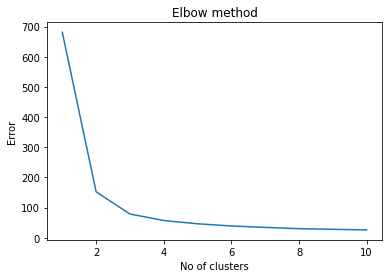

In [5]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(xd)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The plot says that the optimal value of *k* is between 2 and 4, as an elbow-like shape is formed where `k=3`.

Additional ways to find the optimal value of *k* are demonstrated as part of the next section.

In [6]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(xd)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

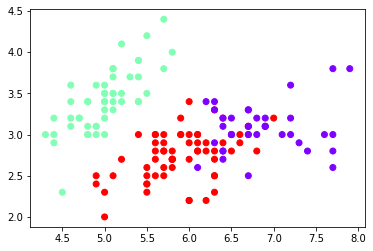

In [7]:
# Visualize Clustering
plt.scatter(xd[:,0], xd[:,1], c= y_kmeans3, cmap = 'rainbow');

------

-----

### Trying *k*-means with a correlation matrix

Combining a correlation matrix as a dataframe and https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

Builds a lot on my notebook [Hierarchical_clustering](Hierarchical_clustering.ipynb).

-----

First make a dataframe that has 3 clusters. Based on https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb , see my notebook [Hierarchical_clustering](Hierarchical_clustering.ipynb).

In [8]:
import pandas as pd
import numpy as np

# Generate 50 variables with 1000 samples
n_variables = 50
n_samples = 1000

# Those variables will be spread over 3 clusters of variable sizes
cluster_size = [5,22,28]
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df = pd.DataFrame(np.array(variables).transpose())

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.380730,-0.132808,0.967141,-1.388105,-0.750284,-2.725994,1.784737,0.179587,-0.301103,0.286975,...,0.915048,0.411653,0.088698,-2.078161,0.160478,-1.062528,-0.850749,-0.224814,-0.177537,-1.556360
1,-0.893132,-1.578214,-3.517145,-0.263588,-3.240319,-0.440331,-2.202959,-0.506844,-1.133392,-1.174074,...,-1.477105,-3.332005,-1.299256,-0.833509,0.682805,-0.975419,-0.857195,-1.295318,-0.578303,-0.216323
2,-0.418478,-2.596209,-0.375227,-1.596820,-1.617801,-0.502787,-0.733466,-2.682240,-0.733446,0.210150,...,1.087330,0.736257,-0.600826,-2.451957,0.528638,-0.817526,-1.058303,-3.192584,-1.299153,-1.003415
3,-1.659825,-0.180410,-0.417084,0.826189,-1.220161,1.466083,-0.988269,-1.935094,1.695046,0.257412,...,-2.482760,-1.508952,1.895124,-0.550783,-1.047385,0.272370,-0.427992,1.431470,-0.885914,-1.069893
4,1.025708,1.357204,-0.579468,0.183042,-1.553207,1.617970,-1.128615,0.675121,2.612752,-0.407949,...,0.734629,0.501394,0.431698,0.948638,-0.004282,1.216727,-0.099182,0.995372,-0.037055,1.348190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.319332,-0.000954,2.017417,-0.072174,-1.234713,1.357192,0.588207,1.199606,0.594107,1.090685,...,0.249927,-0.616536,0.318022,1.209359,0.566964,1.470725,0.695448,-0.175744,2.184117,-0.856011
996,1.708898,-1.885013,1.353000,-1.786170,1.921298,-2.354424,1.372686,-1.694747,-1.750229,-3.344459,...,1.125697,-0.642791,-0.552708,-3.572642,1.342092,-2.200624,1.125982,-1.834808,0.349508,-1.791228
997,0.211821,0.161226,0.790216,0.472300,1.165477,1.770960,1.049410,0.962291,1.701688,-2.438806,...,0.273057,0.522718,0.846684,1.187491,-0.377670,-0.650239,1.406443,1.330393,0.756227,1.053324
998,0.188022,-1.219345,0.752406,0.547526,3.226366,0.590404,0.903622,-0.916632,1.035890,1.069242,...,0.803189,1.866494,1.383951,0.324409,1.070329,0.642227,1.336438,0.455061,1.494913,-0.896146


Note that for *k*-means you have to give it the number of clusters and I know there is three here, and so starting with that.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans3corr = KMeans(n_clusters=3)
print("Number of clusters SET AS THREE in the preparation.\n")
y_kmeans3corr = kmeans3corr.fit_predict(df.corr())
print(y_kmeans3corr)

# print(kmeans3corr.cluster_centers_)

for x in np.unique(y_kmeans3corr):
    class_members = [xc for xc in y_kmeans3corr if xc == x]
    print(f"{len(class_members)} variables in grouping {x}")

Number of clusters SET AS THREE in the preparation.

[2 1 2 1 2 1 2 1 1 0 2 0 1 2 1 0 2 1 2 2 1 1 2 2 2 1 1 2 1 1 2 2 0 1 1 0 2
 1 1 1 2 2 1 1 2 1 2 1 2 1]
5 variables in grouping 0
24 variables in grouping 1
21 variables in grouping 2


Orginally I thought the *k*-means clustering was matching better to the five (although occaisionally I did see four) for the smallest cluster than I generally saw the hierarchical clustering achieve (usually that gives four sligthly more often than resulting in five), but when I looked in depth it seemed usually have same result. I used to sugges seeing (and running several times) my notebook [Hierarchical_clustering](Hierarchical_clustering.ipynb) for comparison, but now I have added comparison below and a programmatic check. Both methods seem to work equally well for this mock data. (But recall with k-means you have to determine a good cluster number before you can do to final fit.)

How I plot the result though?

The trick to going to the heatmap plot is to realize that for Scikit-learn's `KMeans`, the output of `KMeans().fit_predict(x)` is like the `ind` index from the correlation matrix clustering example.

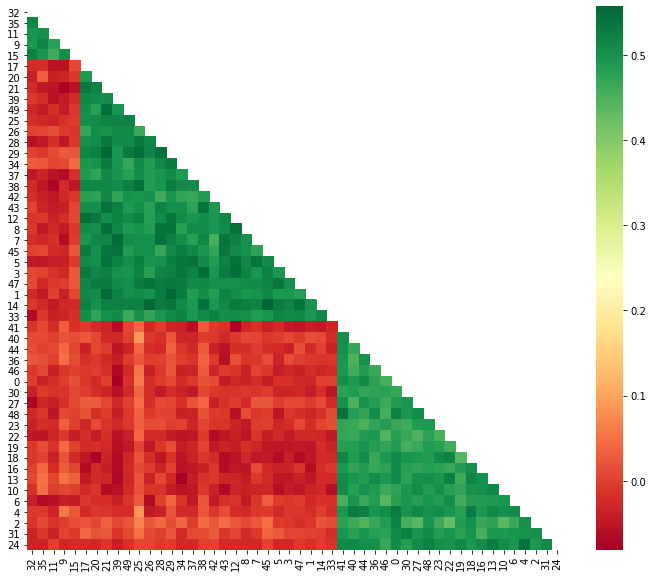

In [11]:
import seaborn as sns
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    based on https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb
    and converted to using Seaborn 
    and adding plotting only lower triangular of the matrix
    by Wayne 6-10-2020
    '''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr_df = df.corr()
    
    # make the mask based on https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/
    mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
    #print( mask_ut)  # FOR DEBUGGING
    
    # Plot the correlation matrix
    '''
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)
    '''
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size+2, size))
    sns.heatmap(corr_df, mask=mask_ut, cmap="RdYlGn")
columns = [df.columns.tolist()[i] for i in list((np.argsort(y_kmeans3corr)))]
df_clustered = df.reindex(columns, axis=1) # this line updated from source because `df.reindex_axis()` deprecated
plot_corr(df_clustered, size=10)

And to better compare results from *k*-means vs. hierarchical clustering (see my notebook [Hierarchical_clustering](Hierarchical_clustering.ipynb) for more information the latter) (Note though that for hierarchical clustering the number of clusters didn't need to be included as input data or function argument):

24 variables in cluster 1
5 variables in cluster 2
21 variables in cluster 3


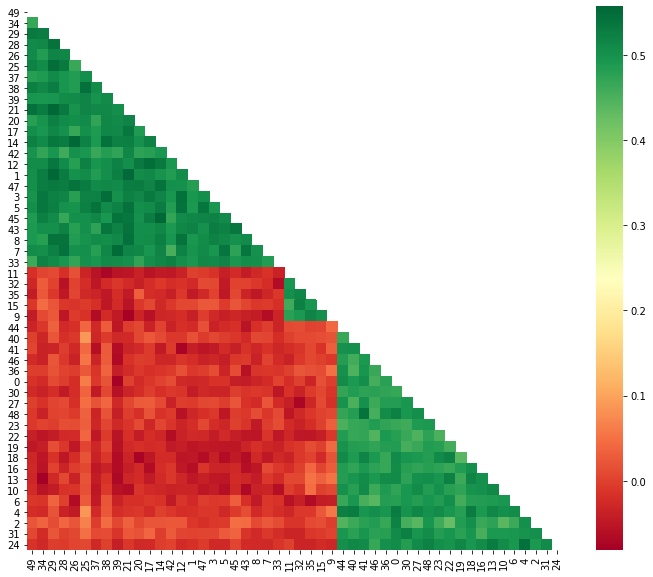

In [12]:
# hierarchical clustering  <--- FOR comparing to k-means result
import scipy
import scipy.cluster.hierarchy as sch


X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df_h_clustered = df.reindex(columns, axis=1) # this line updated from source because `df.reindex_axis()` deprecated

for x in np.unique(ind):
    class_members = [xc for xc in ind if xc == x]
    print(f"{len(class_members)} variables in cluster {x}")

plot_corr(df_h_clustered, size=10)

(Five? Thought it usually gave four. So maybe hierarchichal clustering can give five maybe more often than I've seen before? Or thought I noted before?)

Since it is hard to look at the plots and easily compare, we will compare the two results programmatically (based on code first worked out :

In [13]:
# Membership report (based on code first worked out under 
# 'Obtaining and viewing the cluster membership without the rest of plot' section of 
# my notebook `Correlation matrix clustering featuring heatmap plot with seaborn.ipynb`.)
# Prepare the data
# Prepare the data: the k-means output
data4df = y_kmeans3corr
df4view = pd.DataFrame(data4df)  #<--- note DO NOT USE `pd.DataFrame.from_records` here
df4view = df4view.T
labels4df = sorted(list(df_clustered.columns))
df4view.columns = labels4df
# The process below (based on https://stackoverflow.com/a/52720936/8508004) is complex but works: 
# (it was worked out in the cell where I worked out the plotting visualization of 
# "Colored according to cluster membership")
df4viewreoriented = df4view.T
df4viewreoriented = df4viewreoriented.rename_axis('sample_ids')
df4viewreoriented.columns = ["cluster_num"]
df4viewreoriented = df4viewreoriented.sort_values(by = ['cluster_num', 'sample_ids'], ascending = [True, True])
df4view = df4viewreoriented.T

# Prepare the data: the hierarchical clustering output
data4df_h = ind
df4view_h = pd.DataFrame(data4df_h)  #<--- note DO NOT USE `pd.DataFrame.from_records` here
df4view_h = df4view_h.T
labels4df_h = sorted(list(df_h_clustered.columns))
df4view_h.columns = labels4df_h
# The process below (based on https://stackoverflow.com/a/52720936/8508004) is complex but works: 
# (it was worked out in the cell where I worked out the plotting visualization of 
# "Colored according to cluster membership")
df4viewreoriented_h = df4view_h.T
df4viewreoriented_h = df4viewreoriented_h.rename_axis('sample_ids')
df4viewreoriented_h.columns = ["cluster_num"]
df4viewreoriented_h = df4viewreoriented_h.sort_values(by = ['cluster_num', 'sample_ids'], ascending = [True, True])
df4view_h = df4viewreoriented_h.T

# Report after data preparation
print("The members of each cluster predicted by K-MEANS in increasing order by cluster "
      f"and then label are:\n{list(df4view.columns)}")
clusterBYindex = zip(df4view.values[0].tolist(),list(df4view.columns))
from collections import defaultdict 
cluster_assignments = defaultdict(list)
for x in clusterBYindex:
    cluster_assignments[x[0]].append(x[1])
print("Cluster breakdown:")
for k,v in cluster_assignments.items():
    print(f"The {len(v)} members of cluster {k} are: {v}")
print("The members of each cluster predicted by HIERARCHICHAL CLUSTERING in increasing order by cluster "
      f"and then label are:\n{list(df4view_h.columns)}")
clusterBYindex_h = zip(df4view_h.values[0].tolist(),list(df4view_h.columns))
from collections import defaultdict 
cluster_assignments_h = defaultdict(list)
for x in clusterBYindex_h:
    cluster_assignments_h[x[0]].append(x[1])
print("Cluster breakdown:")
for k,v in cluster_assignments_h.items():
    print(f"The {len(v)} members of cluster {k} are: {v}")
    
#Check both are specifically equal
# first determine correspondences
correspondence = {}
for k,v in cluster_assignments.items():
    first_in_cluster = v[0]
    # find the first k-means value among the hierarchical
    for kh,vh in cluster_assignments_h.items():
        if first_in_cluster in vh:
            correspondence[k] = kh
# Check each correspondence has same members
c_results = []
for match_k,match_h in correspondence.items():
   c_results.append(set(cluster_assignments[match_k]) == set(cluster_assignments_h[match_h]))
if all(c_results):
    print("All k-means and hierarchical clusters match.")

The members of each cluster predicted by K-MEANS in increasing order by cluster and then label are:
[9, 11, 15, 32, 35, 1, 3, 5, 7, 8, 12, 14, 17, 20, 21, 25, 26, 28, 29, 33, 34, 37, 38, 39, 42, 43, 45, 47, 49, 0, 2, 4, 6, 10, 13, 16, 18, 19, 22, 23, 24, 27, 30, 31, 36, 40, 41, 44, 46, 48]
Cluster breakdown:
The 5 members of cluster 0 are: [9, 11, 15, 32, 35]
The 24 members of cluster 1 are: [1, 3, 5, 7, 8, 12, 14, 17, 20, 21, 25, 26, 28, 29, 33, 34, 37, 38, 39, 42, 43, 45, 47, 49]
The 21 members of cluster 2 are: [0, 2, 4, 6, 10, 13, 16, 18, 19, 22, 23, 24, 27, 30, 31, 36, 40, 41, 44, 46, 48]
The members of each cluster predicted by HIERARCHICHAL CLUSTERING in increasing order by cluster and then label are:
[1, 3, 5, 7, 8, 12, 14, 17, 20, 21, 25, 26, 28, 29, 33, 34, 37, 38, 39, 42, 43, 45, 47, 49, 9, 11, 15, 32, 35, 0, 2, 4, 6, 10, 13, 16, 18, 19, 22, 23, 24, 27, 30, 31, 36, 40, 41, 44, 46, 48]
Cluster breakdown:
The 24 members of cluster 1 are: [1, 3, 5, 7, 8, 12, 14, 17, 20, 21, 25,

Most (maybe even all?) of the time this is run, it is easy to see with this fake, generated input data that the clusters come out the same whether hierarchical clustering or *k*-means is used. (Despite the fact that the specific order(index assigned) of the clusters is different.)

#### Does using the 'Elbow method' with *k*-means show agreement with three clusters from the correlation matrix?

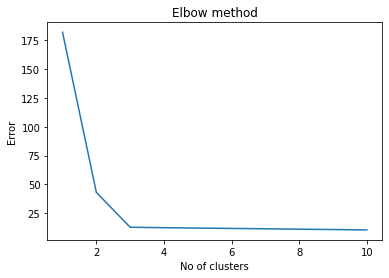

In [14]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df.corr())
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Yes, 'Elbow method' agrees with what was built in to the artificially-generated input data as an elbow-like shape is formed where `k=3`.

There are additional methods for determining the optimal value of *k* besides using the 'Elbow Method', which sometimes doesn't offer a clear cut choice because it can be hard to clearly  identify the value of *k* where the score begins to decrease most rapidly before the curve reaches a plateau. A couple of the additional methods for dtermining the optimal value for *k* are discussed and illustrated using Scikit-learn by Georgios Drakos in a blog post entitled 'Silhouette Analysis vs Elbow Method vs Davies-Bouldin Index: Selecting the optimal number of clusters for KMeans clustering' [here](https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/).

Turns out with small data like this, they are easy to implement from the data Scikit-learn's *Kmeans* generates already. The code below (adapted from Georgios Drakos's code [here](https://github.com/geodra/Articles/blob/master/Davies-Bouldin%20Index%20vs%20Silhouette%20Analysis%20vs%20Elbow%20Method%20Selecting%20the%20optimal%20number%20of%20clusters%20for%20KMeans%20clustering.ipynb) for this input data) will illustrate that. **Be patient as this takes a few seconds to cycle through a number of values for k.**

In [15]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# normalize data
X = df.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

sse,db,slc = {}, {}, {}
for k in range(2, 11):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X,clusters)

The following code would plot the 'Elbow Method' again using the data calculated in the cell above. Since we already ran that above, I'll leave running that one again as an exercise for the reader and move on to the others.

```python
# Elbow method plot from the loop in code cell above
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
```

#### Davies-Bouldin Index plotting

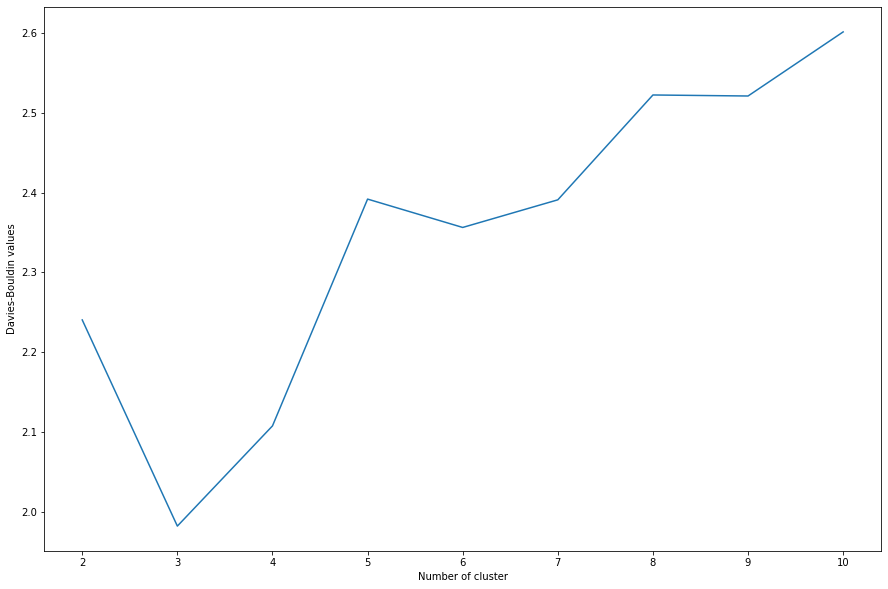

In [16]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

Plotting the Davies-Bouldin index clearly agrees with the 'Elbow method' with *k* equal to three for this mock input data. That is because three as the number of clusters clearly shows the smallest Davies-Bouldin index value.

#### Silhouette Analysis plot

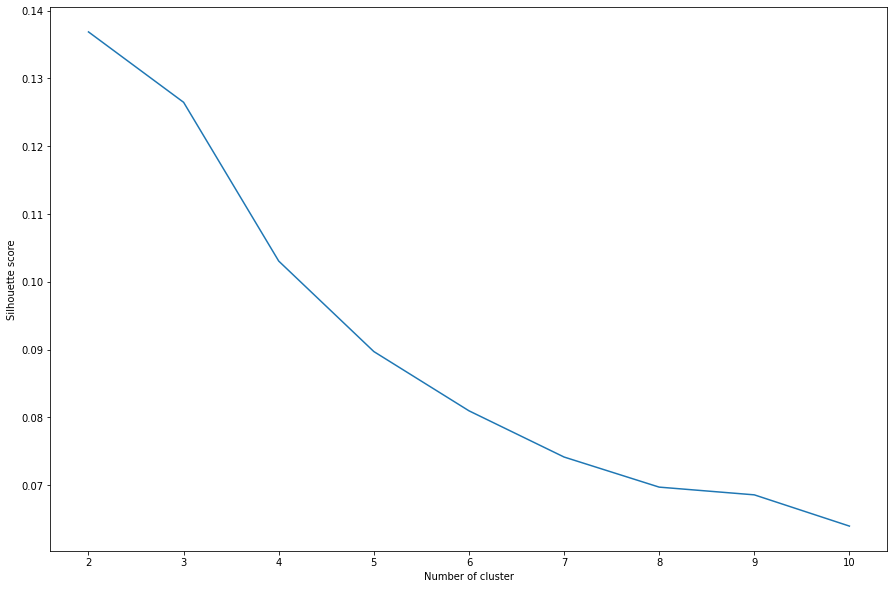

In [17]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

Beyond the direct plot of the scores, additional insight into the data is soemtimes necessary when using the silhouette score analysis, and so the cell below plots visualizing the results for different *k* values. (The mock data used as the source for the implementation of the silhouette score analysis [here](https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/) actually shows the highest silhouette score where the 'Davies-Bouldin Index' plotting approach also showed the lowest score, *k* equal to three and so it isn't always the case you need additional information.) The plot above on its on would suggest two or three but for silhouette score analysis you may need to consider additional data

When using the the silhouette analysis we are normally looking for a value of *k* that provides:

- High average silhouette scores.
- No clusters with a maximum silhouette score less than the average score as this can indicate poor clustering and a bad choice of k.
- Well-clustered data tends to have clusters where the silhouettes are similar in size and the silhouettes of each cluster member are similar.

The latter point is important in helping here as illustrated by the code below.

For n_clusters = 2 The average silhouette_score is : 0.1368557411841201
For n_clusters = 3 The average silhouette_score is : 0.1264707563154773
For n_clusters = 4 The average silhouette_score is : 0.10305205417375055
For n_clusters = 5 The average silhouette_score is : 0.08970372860435441
For n_clusters = 6 The average silhouette_score is : 0.08096507829845134
For n_clusters = 7 The average silhouette_score is : 0.07414502711597853
For n_clusters = 8 The average silhouette_score is : 0.06970508740425477
For n_clusters = 9 The average silhouette_score is : 0.06856640523475024
For n_clusters = 10 The average silhouette_score is : 0.06395713253324518


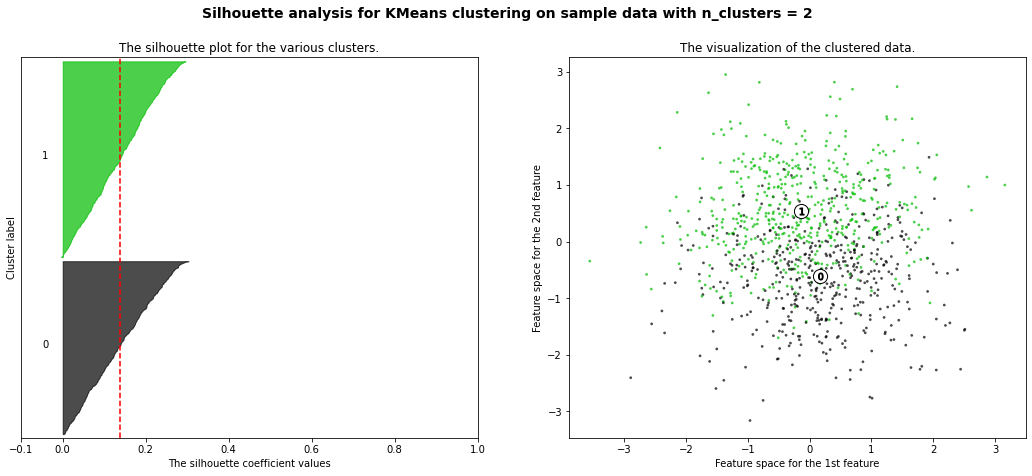

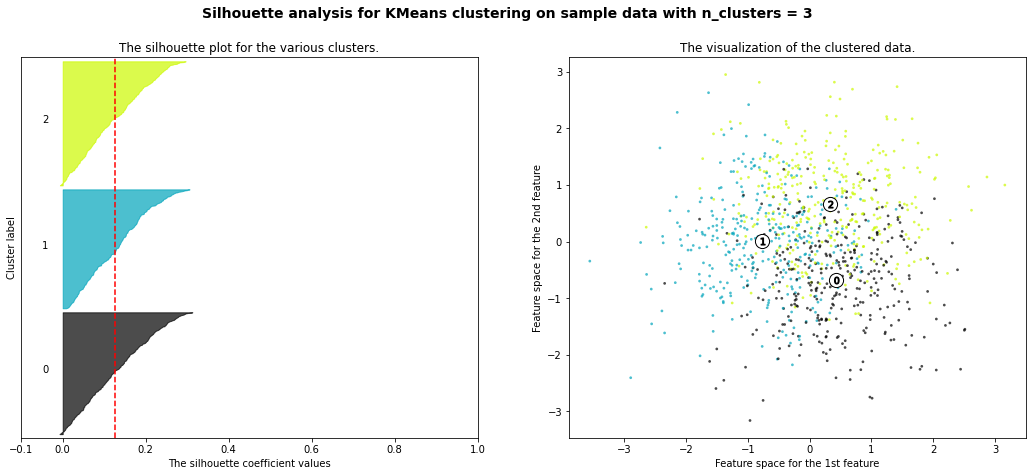

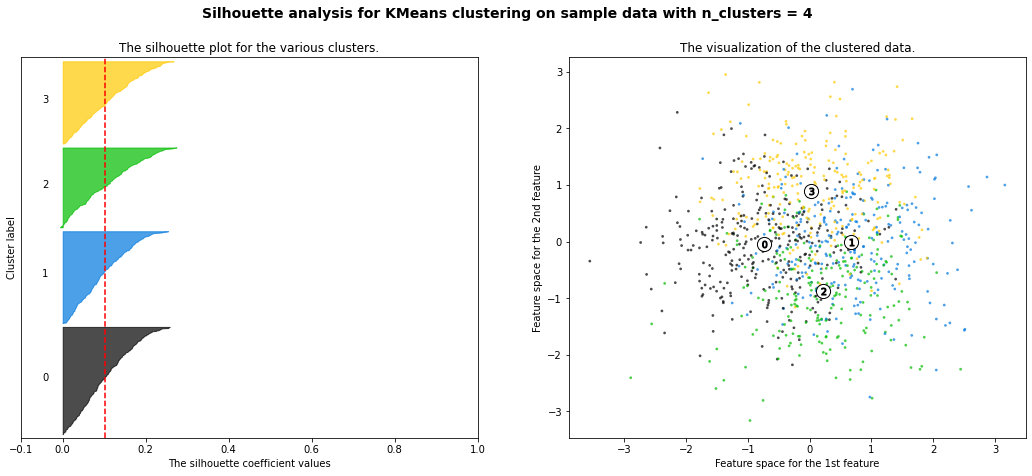

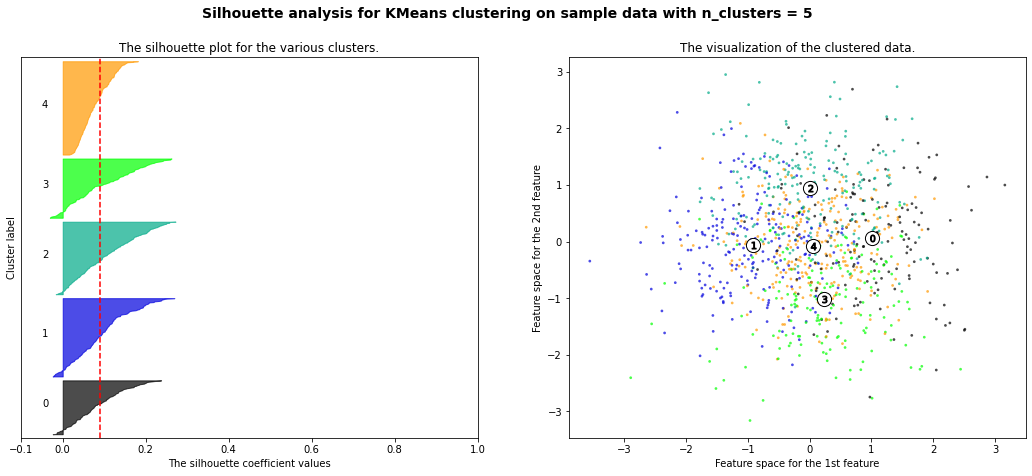

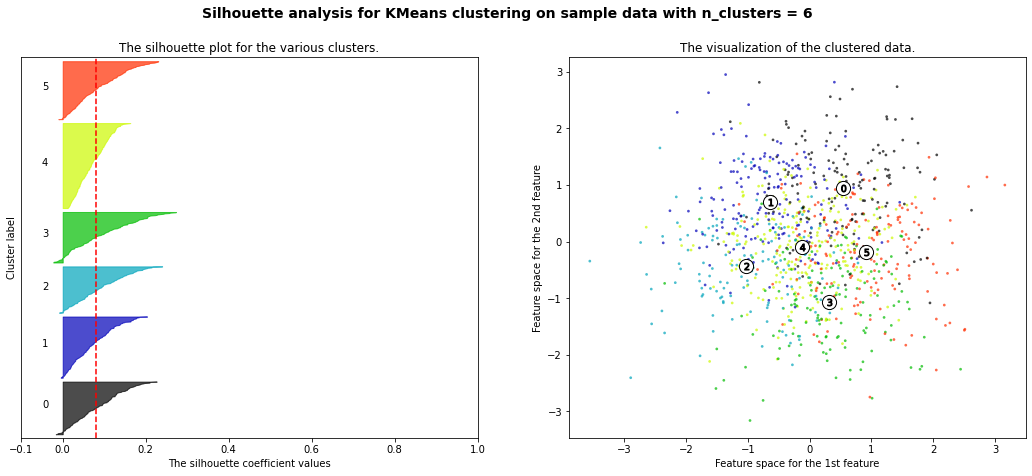

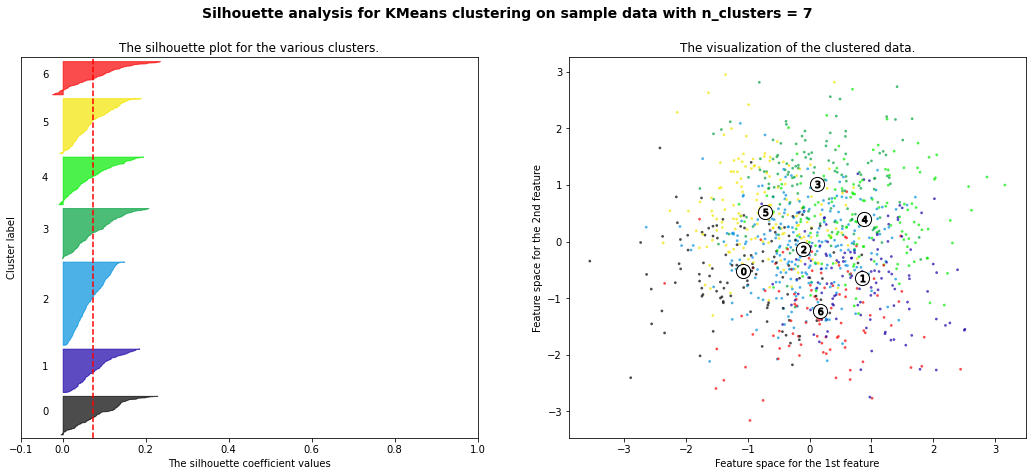

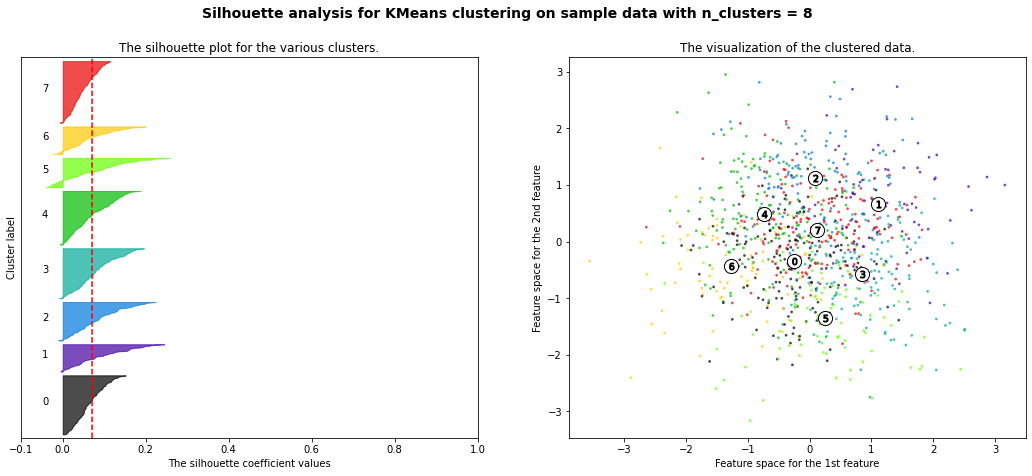

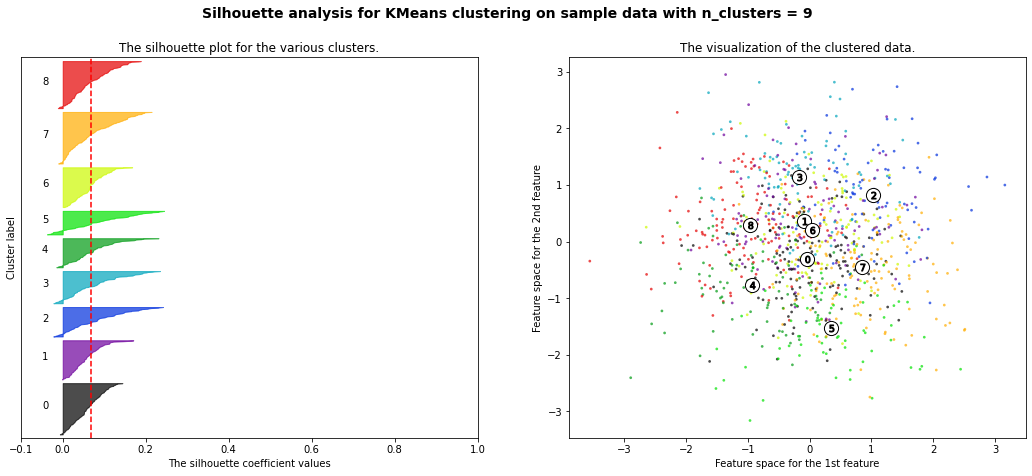

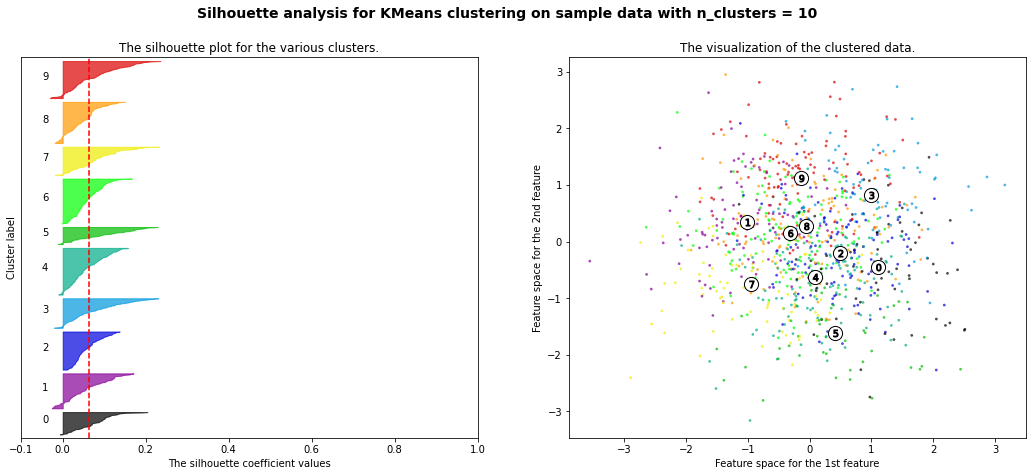

In [18]:
for n_clusters in range(2, 11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Note that for *k* of three the cluster sizes are most evenly distributed, whereas for two or four there is one that is slightly bigger. For this data, the silhouette score analysis approach isn't really all that clear-cut. For other data, for example see [here](https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/) it may be. This does illustrate something to keep in mind when using *k*-means that is emphasized in bold below:

Even with this mock data, it isn't obvious what is the best choice for *k* from all the methods. Hence, **if computationally feasible, it can often be best to run all the methods and select the one with the best support**. Sometimes the calculations needed though may this not very feabible and you are better with a clustering method that selects the optimal number of clusters itself, such a hierarchical clustering or DBSCAN. 

-----

-----